### Customer retention Analytics

##### Business Problem:
An International bank collected a sample data of 10,000 customers. They observed that some of their custimers are leaving or churning in an unusually high rate and they want to find understand and access why their customers keep leaving. They have hiered you as a data scientist to look into the data to give then some insight.

##### Data:
The data was collected within the last 5 months, the feautures include the customer's name, creditscore, geography, gendey,age,tenure,balnce, number of products(accounts),credit card status(whether they have one or not), estimated salary, activity status(active member or not) and if the customer remained with them.

#### Goal:
Your goal is to create a geodemographic segmentation  to identify which of the customers have the highest risk of leaving.

### installing the necessary libraries

In [29]:
!python -m pip install --user --upgrade pip

!pip3 install pandas==0.23.4 matplotlib==3.0.3 seaborn==0.9.0 scikit-learn==0.22

Defaulting to user installation because normal site-packages is not writeable


In [30]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

### Working on a banking dataset to detect churn activities

In [31]:
#importing the data
data = pd.read_csv("https://raw.githubusercontent.com/MavenCode/KubeflowTraining/master/Data/Telco/Churn_Modelling.csv")

In [32]:
#viewing the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Cleaning and EDA 

In [33]:
#size of data
data.shape

(10000, 14)

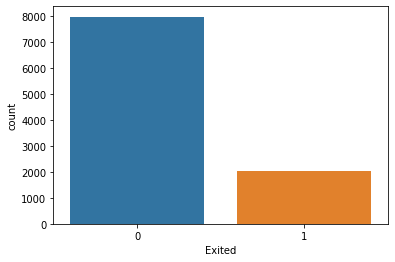

In [34]:
#frequency of the target classes
sns.countplot(x='Exited', data=data)

From the data we have more information on the customers that stayed at the bank

In [35]:
#checking for datatype of each column
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [36]:
#checking for missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
#dropping some columns that are not needed
data = data.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

In [38]:
#viewing the unique values in Geography column
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [39]:
#data features
X = data.iloc[:,:-1]

In [40]:
#target data
y = data.iloc[:,-1:]

In [41]:
#encoding the categorical columns
le = LabelEncoder()
ohe = OneHotEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
geo_df = pd.DataFrame(ohe.fit_transform(X[['Geography']]).toarray())

#getting feature name after onehotencoding
geo_df.columns = ohe.get_feature_names(['Geography'])

#merging geo_df with the main data
X = X.join(geo_df)

In [42]:
#dropping the old columns after encoding
X.drop(columns=['Geography'], axis=1, inplace=True)

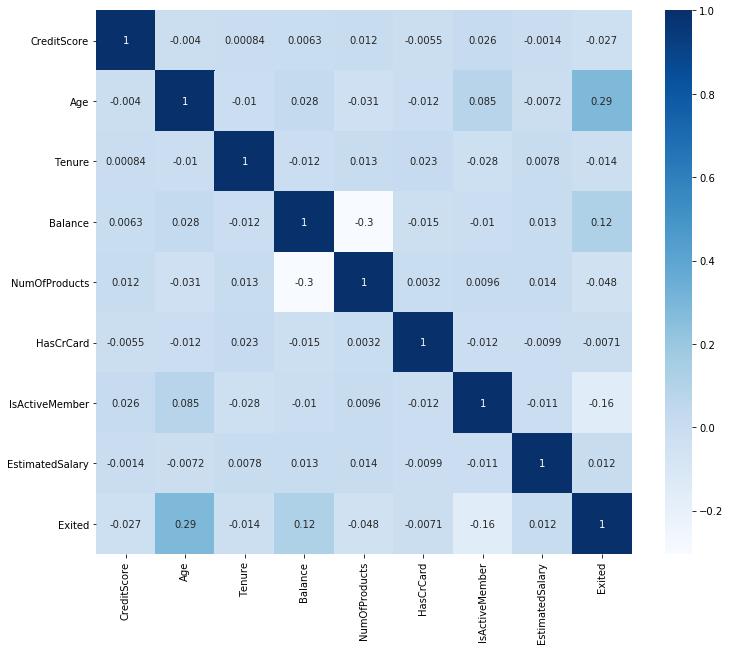

In [43]:
#using heatmap see the correlation between each features
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

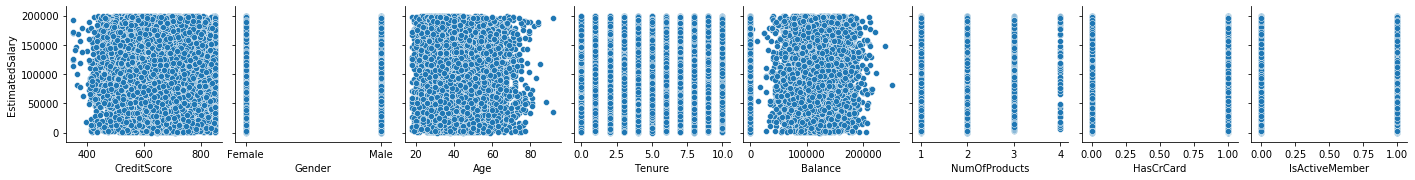

In [44]:
sns.pairplot(data=data, y_vars=['EstimatedSalary'], x_vars=['CreditScore', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember'])

### Split data

In [45]:
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size=0.2, random_state = 42)

In [46]:
data_dict = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}
for i in data_dict:
    print("The shape of {} is {}".format(i,data_dict[i].shape))

The shape of X_train is (8000, 12)
The shape of X_test is (2000, 12)
The shape of y_train is (8000, 1)
The shape of y_test is (2000, 1)


### Feature Scaling

In [47]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
#saving the values from the dataframe
y_train = y_train.values

### Deep learning model

In [49]:
#initializing the classifier model with its input, hidden and output layers
classifier = Sequential()
classifier.add(Dense(units = 16, activation='relu', input_dim=12,))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

### Compiling the classifier model with Stochastic Gradient Desecnt

In [50]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy' , metrics =['accuracy'])

### Fitting the classifier model

In [51]:
classifier.fit(X_train, y_train, batch_size=10 , epochs=50)

Epoch 1/50
8000/8000 [==============================] - 1s 178us/sample - loss: 0.4902 - acc: 0.7824
Epoch 2/50
8000/8000 [==============================] - 1s 176us/sample - loss: 0.4032 - acc: 0.8371
Epoch 3/50
8000/8000 [==============================] - 1s 161us/sample - loss: 0.3722 - acc: 0.8490
Epoch 4/50
8000/8000 [==============================] - 1s 155us/sample - loss: 0.3577 - acc: 0.8533
Epoch 5/50
8000/8000 [==============================] - 1s 157us/sample - loss: 0.3520 - acc: 0.8562
Epoch 6/50
8000/8000 [==============================] - 1s 156us/sample - loss: 0.3475 - acc: 0.8560
Epoch 7/50
8000/8000 [==============================] - 1s 158us/sample - loss: 0.3448 - acc: 0.8600
Epoch 8/50
8000/8000 [==============================] - 1s 162us/sample - loss: 0.3429 - acc: 0.8599
Epoch 9/50
8000/8000 [==============================] - 1s 162us/sample - loss: 0.3409 - acc: 0.8618
Epoch 10/50
8000/8000 [==============================] - 1s 166us/sample - loss: 0.3395 - a

We can see that the accuracy and loss of the model on the train dataset is 86% and 0.3146 respectively

### Getting the model's predictions o  the test data

In [52]:
# These probabilities would help determine which of the customers have high risk of leaving the bank
y_pred = classifier.predict(X_test)
y_pred

array([[0.03858656],
       [0.00859997],
       [0.09418085],
       ...,
       [0.7850509 ],
       [0.14189467],
       [0.26060432]], dtype=float32)

From the probabilities obtained above, the bank can segment each of the customers and know the ones to prevent from leaving
by developing ideas to keep them.

In [53]:
# create a threshold for the confution matrics
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [54]:
countFalse =0
countTrue =0
for i in y_pred:
    if i[0] == False:
        countFalse += 1
    else:
        countTrue += 1
print("countF :{} and countT: {}".format(countFalse,countTrue))

countF :1754 and countT: 246


In [55]:
# confusion metrics
cm = confusion_matrix(y_test.values,y_pred)
print(cm)

[[1543   64]
 [ 211  182]]


From our confusion matrix we conclude that:
1. **True positive:** 178(We predicted a positive result and it was positive)- the model rightly predicted the ones who left the bank 
2. **True negative:** 1545(We predicted a negative result and it was negative)-the model rightly predicted the ones who stayed at the bank 
3. **False positive:** 62(We predicted a positive result and it was negative)-the model predicted that these ones left when they actually stayed
4. **False negative:** 215(We predicted a negative result and it was positive)- the model predicted that these ones stayed when they actually left

In [56]:
#classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

